### Submission Dicoding Belajar Machine Learning untuk Pemula
##### Nama : Grace Sandi Elisabet Malau

### Inisialisasi Library

#### Inisialisasi Library yang akan digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras_preprocessing
from keras_preprocessing import image

#### Unduh dan Simpan Dataset

In [2]:
# mengunduh dan menyimpan dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-24 00:21:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.51MB/s    in 44s     

2020-07-24 00:21:48 (7.05 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



#### Installasi library `split-folders`
Split-folders untuk membagi dataset menjadi training, validation, dan testing

In [3]:
pip install split-folders

#### Ekstraksi dataset dari zip ke dalam folder yang disimpan dalam ds_dir

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# melakukan penyimpanan hasil ekstraksi file zip ke file baru
ds_dir = '/tmp/rockpaperscissors'

In [5]:
# list folder di dalam tmp/rockpaperscissors/rps-cv-images
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

### Image data preprocessing

#### Bagi folder menjadi folder training, validation, dan testing

In [12]:
# Library membagi dataset menjadi training, validation, dan testing
import split_folders

# split folder dengan ratio training 0,6 (60%), validation dan testing dengan total 0,4 (40%), simpan ke directory splitOutput 
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="splitOutput", ratio=(0.6, 0.2, 0.2))

Copying files: 2188 files [00:00, 3742.40 files/s]


Setelah dibagi dengan masing-masing nilai ratio. Cek isi folder output

In [13]:
os.listdir('splitOutput')

['train', 'val', 'test']

In [14]:
os.listdir('splitOutput/train')

['scissors', 'paper', 'rock']

In [15]:
os.listdir('splitOutput/val')

['scissors', 'paper', 'rock']

In [16]:
os.listdir('splitOutput/test')

['scissors', 'paper', 'rock']

Ubah directory untuk dipakai dalam uji coba project ini

In [17]:
new_dir = 'splitOutput' # jadikan splitOutput tadi ke directory baru

In [18]:
# menyimpan train dan validation set dari dataset directory ke train dan validation directory dari new_dir
train_dir = os.path.join(new_dir, 'train')
validation_dir = os.path.join(new_dir, 'val')

In [19]:
# membuat direktori rock, paper, dan scissors pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
 
# membuat direktori rock, paper, scissors pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

#### Augmentasi Gambar dengan `ImageDataGenerator`

In [54]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=0.2,
                    shear_range = 0.2,
                    brightness_range = [0.2,1.0],
                    zoom_range = [0.5,1.0],
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=0.2,
                    shear_range = 0.2,
                    brightness_range = [0.2,1.0],
                    zoom_range = [0.5,1.0],
                    fill_mode = 'nearest')

#### Flow from directory
 Mempersiapkan data latih yang akan dipelajari oleh model

In [55]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        # karena kita merupakan masalah klasifikasi multi kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

# cetak classes di train_generator
print(train_generator.class_indices)

Found 1312 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


In [56]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
         # karena kita merupakan masalah klasifikasi multi kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

# cetak classes di validation_generator
print(validation_generator.class_indices)

Found 876 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


#### Cek pembagian dataset
Pembagian terdiri atas : training dan validation serta berdasarkan kategori rock, paper, dan scissors

In [57]:
num_rock_tr = len(os.listdir(train_rock_dir))
num_paper_tr = len(os.listdir(train_paper_dir))
num_scissors_tr = len(os.listdir(train_scissors_dir))

num_rock_val = len(os.listdir(validation_rock_dir))
num_paper_val = len(os.listdir(validation_paper_dir))
num_scissors_val = len(os.listdir(validation_scissors_dir))

total_train = num_rock_tr + num_paper_tr + num_scissors_tr
total_val = num_rock_val + num_paper_val + num_scissors_val

In [58]:
print('total training rock images:', num_rock_tr)
print('total training paper images:', num_paper_tr)
print('total training scissors images:', num_scissors_tr)

print('total validation rock images:', num_rock_val)
print('total validation paper images:', num_paper_val)
print('total validation scissors images:', num_scissors_val)
print("---------------------------------")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training rock images: 435
total training paper images: 427
total training scissors images: 450
total validation rock images: 291
total validation paper images: 285
total validation scissors images: 300
---------------------------------
Total training images: 1312
Total validation images: 876


#### Melihat sampel gambar

In [59]:
rockImage = os.listdir(train_rock_dir)
rockImage[:10]

['sY2021zJacpvGLBT.png',
 'nx0qhNSB7YMLfe2E.png',
 'yrzokMUYHlOLsRhQ.png',
 '6ZWuYAkiYnDTDa2N.png',
 'AiAPUXqX24FjC0mU.png',
 'YsMoNGFWu7H9X7DM.png',
 'BsWasfK2PdoRNEDw.png',
 'fiivFS9iUjynQIB5.png',
 'c1rdxANL8E7yG3ZI.png',
 '9JYn3D5vkXtrasPJ.png']

In [60]:
paperImage = os.listdir(train_paper_dir)
paperImage[:10]

['77rce5yVvVPIPmp8.png',
 'yhXsHSeStA2dharc.png',
 't3gTGwl94iLuZL1k.png',
 '9giVcOVtFf85mQZd.png',
 'cfCjmEcXysh0H52D.png',
 'qsRQNgddFhV2Mlnn.png',
 'Y7DDimLAYeU323au.png',
 '8q4xxTvBVnXTRSQy.png',
 'RQ78Zpf7uYHXCYcb.png',
 '4Bimc2E5E9jTh1Fh.png']

In [61]:
scissorsImage = os.listdir(train_scissors_dir)
scissorsImage[:10]

['FEpMZLoRy5eAgRvh.png',
 'RpIg0o9X94lDnNcX.png',
 'gzAhbz3S2W0VukHE.png',
 'F0440RDr6eKJusnY.png',
 '1CXgK9fgGdSRggD9.png',
 'w1NflQUWVQmFdZdI.png',
 'BdMHRwUTJ4FI4uPr.png',
 'WtS1aLhJK2FZpcEt.png',
 'JraYBjsfVGokNFhR.png',
 '7jLYhf025vHEX7kp.png']

In [62]:
sample_training_images, _ = next(train_generator)

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

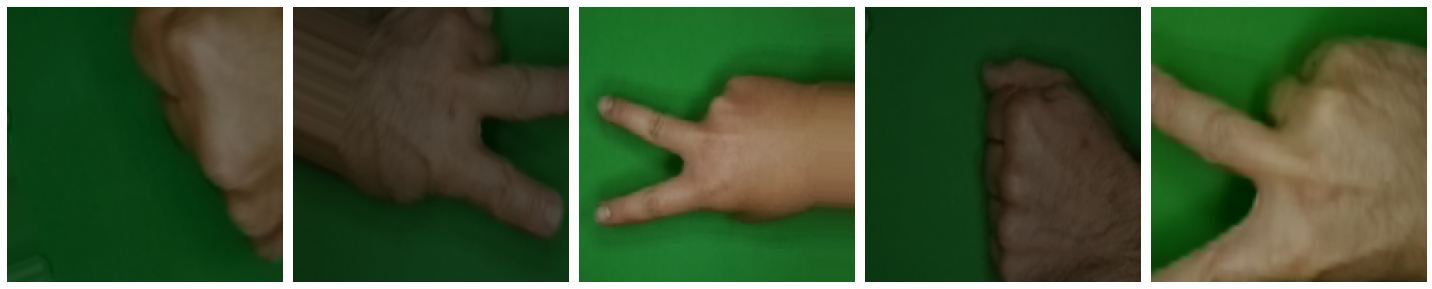

In [64]:
plotImages(sample_training_images[:5])

#### Mendefinisikan arsitektur dari jaringan saraf

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

#### Compile model
Menggunakan `SGD` optimizer dan loss `categorical_crossentropy`

In [85]:
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Fit model

In [88]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=15,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/15
25/25 - 42s - loss: 0.1121 - accuracy: 0.9575 - val_loss: 0.0827 - val_accuracy: 0.9812
Epoch 2/15
25/25 - 41s - loss: 0.1018 - accuracy: 0.9600 - val_loss: 0.0759 - val_accuracy: 0.9750
Epoch 3/15
25/25 - 42s - loss: 0.1050 - accuracy: 0.9613 - val_loss: 0.2359 - val_accuracy: 0.9187
Epoch 4/15
25/25 - 41s - loss: 0.1253 - accuracy: 0.9588 - val_loss: 0.1006 - val_accuracy: 0.9688
Epoch 5/15
25/25 - 46s - loss: 0.1022 - accuracy: 0.9675 - val_loss: 0.1154 - val_accuracy: 0.9688
Epoch 6/15
25/25 - 42s - loss: 0.1232 - accuracy: 0.9613 - val_loss: 0.1277 - val_accuracy: 0.9688
Epoch 7/15
25/25 - 44s - loss: 0.0884 - accuracy: 0.9712 - val_loss: 0.1101 - val_accuracy: 0.9563
Epoch 8/15
25/25 - 43s - loss: 0.1156 - accuracy: 0.9575 - val_loss: 0.1327 - val_accuracy: 0.9688
Epoch 9/15
25/25 - 43s - loss: 0.1011 - accuracy: 0.9625 - val_loss: 0.1362 - val_accuracy: 0.9625
Epoch 10/15
25/25 - 42s - loss: 0.1043 - accuracy: 0.9688 - val_loss: 0.0804 - val_accuracy: 0.9750
Epoch 11/

#### Visualisasi Model

In [90]:
epochs = 15

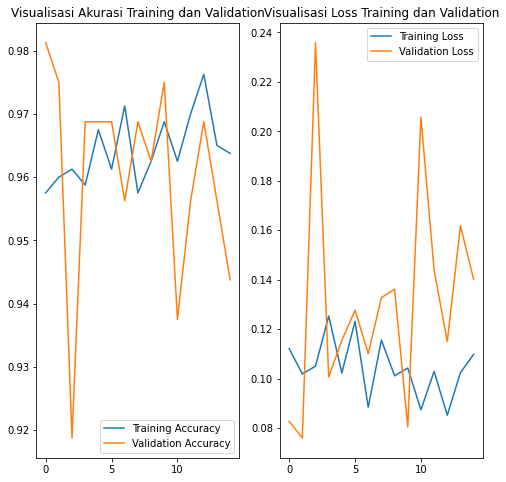

In [91]:
akurasi = history.history['accuracy']
val_akurasi = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, akurasi, label='Training Accuracy')
plt.plot(epochs_range, val_akurasi, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Visualisasi Akurasi Training dan Validation')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Visualisasi Loss Training dan Validation')
plt.show()

#### Uji Coba dengan gambar lainnya
Dengan meng-*upload* gambar, maka hasil dari uji coba dapat dilihat berdasarkan kategori:
1. Jika classes = 0 maka gambar paper
2. Jika classes = 1 maka gambar rock
3. Jika classes = 2 maka gambar scissors 

Saving FmGfsSfUAyHzsiAO.png to FmGfsSfUAyHzsiAO.png
FmGfsSfUAyHzsiAO.png
scissors


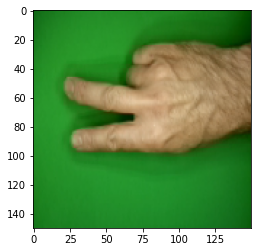

In [95]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for files_new in uploaded.keys():
 
  # predicting images
  path = files_new
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict_classes(images)
  
  print(files_new)
  if classes==0:
    print("paper")
  elif classes==1:
    print("rock")
  else:
    print("scissors")